In [83]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np 
from sklearn.metrics import accuracy_score, make_scorer
import pandas as pd
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from tqdm.notebook import trange
from sklearn.ensemble import RandomForestClassifier
import optuna
from sklearn.model_selection import cross_val_score

In [84]:
data = pd.read_csv('DATA_DQPT_N=2_alpha=05_h=06465.txt',names=['x1','x2','dqpt'])
data

,x1,x2,dqpt
0,0.000000,0.000000,1
1,0.063467,0.000000,1
2,0.126933,0.000000,1
3,0.190400,0.000000,1
4,0.253866,0.000000,1
...,...,...,...
9995,6.029319,3.141593,1
9996,6.092786,3.141593,1
9997,6.156252,3.141593,1
9998,6.219719,3.141593,1


## Descripción de la data

In [85]:
data.describe()

,x1,x2,dqpt
count,10000.000000,10000.000000,10000.000000
mean,3.141593,1.570796,-0.072800
std,1.832121,0.916060,0.997396
min,0.000000,0.000000,-1.000000
25%,1.570796,0.785398,-1.000000
50%,3.141593,1.570796,-1.000000
75%,4.712389,2.356194,1.000000
max,6.283185,3.141593,1.000000


In [86]:
data['dqpt'].value_counts()

dqpt
-1    5364
 1    4636
Name: count, dtype: int64

In [87]:
data

,x1,x2,dqpt
0,0.000000,0.000000,1
1,0.063467,0.000000,1
2,0.126933,0.000000,1
3,0.190400,0.000000,1
4,0.253866,0.000000,1
...,...,...,...
9995,6.029319,3.141593,1
9996,6.092786,3.141593,1
9997,6.156252,3.141593,1
9998,6.219719,3.141593,1


In [88]:
data.loc[:, 'multiplier'] = data['x1'] * data['x2']
data

,x1,x2,dqpt,multiplier
0,0.000000,0.000000,1,0.000000
1,0.063467,0.000000,1,0.000000
2,0.126933,0.000000,1,0.000000
3,0.190400,0.000000,1,0.000000
4,0.253866,0.000000,1,0.000000
...,...,...,...,...
9995,6.029319,3.141593,1,18.941665
9996,6.092786,3.141593,1,19.141051
9997,6.156252,3.141593,1,19.340437
9998,6.219719,3.141593,1,19.539823


In [89]:
train_set, test_set = train_test_split(data,test_size = 0.3, random_state=42,shuffle=False)

In [90]:
x_train = train_set.drop('dqpt',axis=1)
y_train = train_set['dqpt']
x_test = test_set.drop('dqpt',axis=1)
y_test = test_set['dqpt']


In [91]:
model = SVC(kernel="rbf", probability=True)
model.fit(x_train, y_train)

rf_model = RandomForestClassifier()
rf_model.fit(x_train, y_train)

RandomForestClassifier()

In [92]:
rf_prediction = rf_model.predict(x_test)
rfscore = accuracy_score(y_test, rf_prediction)
prediction = model.predict(x_test)
score = accuracy_score(y_test, prediction)
print('% prediction: ', score)
print('% rf_prediction: ', rfscore)

% prediction:  0.5703333333333334
% rf_prediction:  0.6363333333333333


First pred

<Axes: >

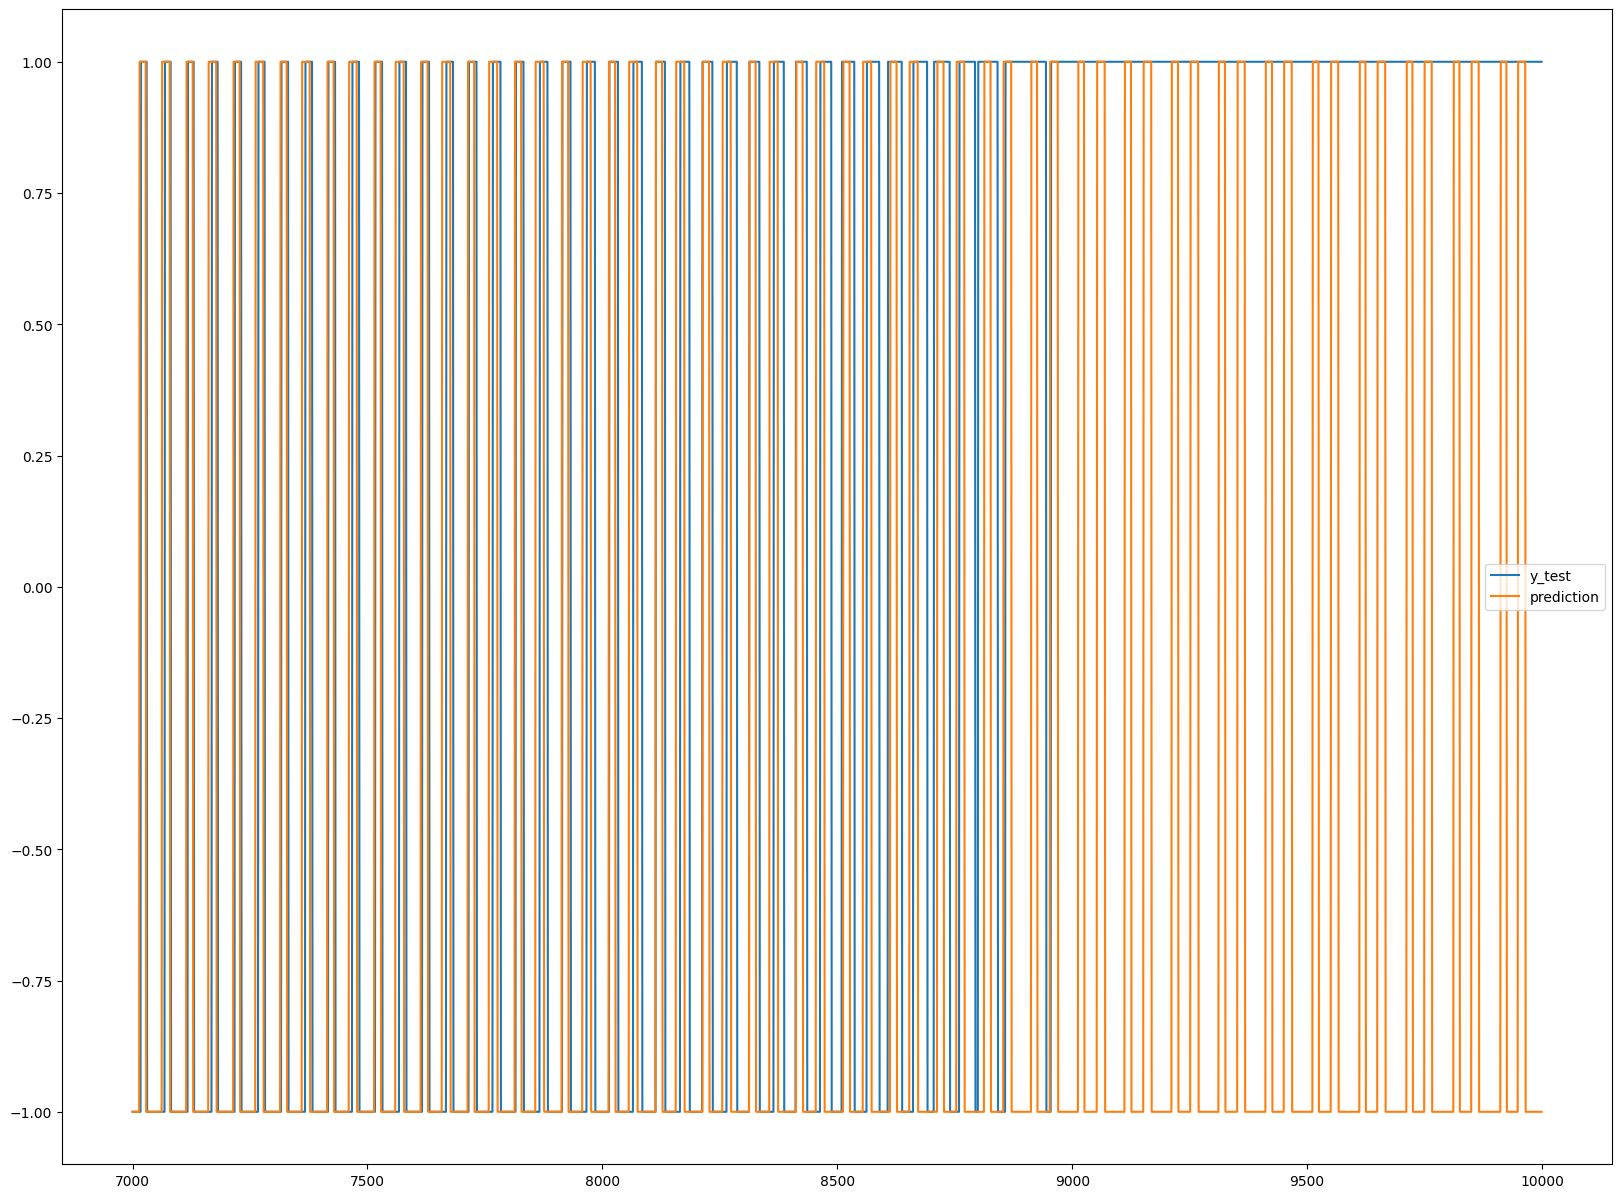

In [93]:
first_comparision = pd.DataFrame({'y_test':y_test,'prediction':prediction})
first_comparision.plot(figsize=(20,15))

In [94]:
points_C = 1000
Cf = 10
score =np.zeros(points_C)
c=np.linspace(1e-3,Cf,points_C)
ypred = 0
for i in range(0,points_C):
    svm = SVC(kernel="rbf", C = c[i]).fit(x_train, y_train)     
    rf = RandomForestClassifier().fit(x_train, y_train) 
    rf_ypred = rf.predict(x_test)
    ypred = svm.predict(x_test)  
    

    score[i] = accuracy_score(y_test, ypred)


index = np.argmax(score)
c_max = c[index]
print('score test max =', score[index])
print('C_max = ', c[index])

Text(0, 0.5, 'Score')

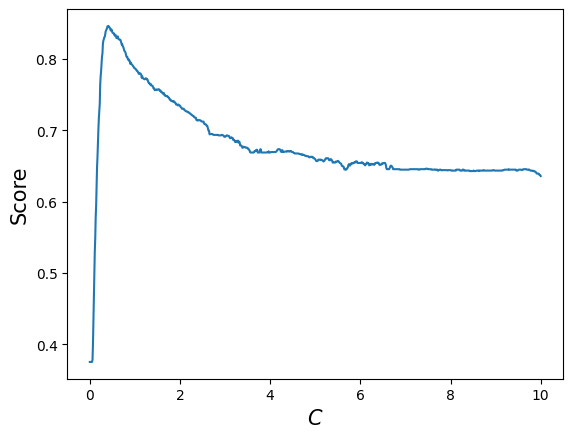

In [ ]:
plt.plot(c,score)
plt.xlabel(r'$C$',fontsize = 15)
plt.ylabel(r'Score',fontsize = 15)

In [ ]:
# def objective(trial):
#     C = trial.suggest_float("svc_c", 1e-10, 1e10, log=True)
#     model = SVC(C=C, kernel="rbf", probability=True)
#     score = cross_val_score(model, x_train, y_train, n_jobs=-1, cv=3)
#     accuracy = score.mean()
#     return accuracy

# study = optuna.create_study(direction="maximize")
# study.optimize(objective, n_trials=100)
# print(study.best_trial)

[I 2023-05-23 22:15:17,366] A new study created in memory with name: no-name-c2b812d8-0146-4440-a19c-bb4e1d0a8c50
[I 2023-05-23 22:15:19,938] Trial 0 finished with value: 0.6054285757311639 and parameters: {'svc_c': 0.001005747952441163}. Best is trial 0 with value: 0.6054285757311639.
[I 2023-05-23 22:15:23,021] Trial 1 finished with value: 0.9367095287085325 and parameters: {'svc_c': 18491966.296128012}. Best is trial 1 with value: 0.9367095287085325.
[I 2023-05-23 22:15:26,439] Trial 2 finished with value: 0.9391384471254494 and parameters: {'svc_c': 7985904568.512429}. Best is trial 2 with value: 0.9391384471254494.
[I 2023-05-23 22:15:27,065] Trial 3 finished with value: 0.8711300781982197 and parameters: {'svc_c': 24930.903720320042}. Best is trial 2 with value: 0.9391384471254494.
[I 2023-05-23 22:15:28,613] Trial 4 finished with value: 0.7078709248830136 and parameters: {'svc_c': 0.052421498311731485}. Best is trial 2 with value: 0.9391384471254494.
[I 2023-05-23 22:15:30,818] 

FrozenTrial(number=2, state=TrialState.COMPLETE, values=[0.9391384471254494], datetime_start=datetime.datetime(2023, 5, 23, 22, 15, 23, 22448), datetime_complete=datetime.datetime(2023, 5, 23, 22, 15, 26, 439129), params={'svc_c': 7985904568.512429}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'svc_c': FloatDistribution(high=10000000000.0, log=True, low=1e-10, step=None)}, trial_id=2, value=None)


In [ ]:
ypred

array([-1, -1, -1, ..., -1, -1, -1])

In [ ]:
f1_score(y_test,prediction,average='weighted')

0.20485958959444178

In [ ]:
precision_score(y_test,ypred, average='weighted')

0.8151242301336938

array([[<Axes: title={'center': 'x1'}>, <Axes: title={'center': 'x2'}>],
       [<Axes: title={'center': 'dqpt'}>, <Axes: >]], dtype=object)

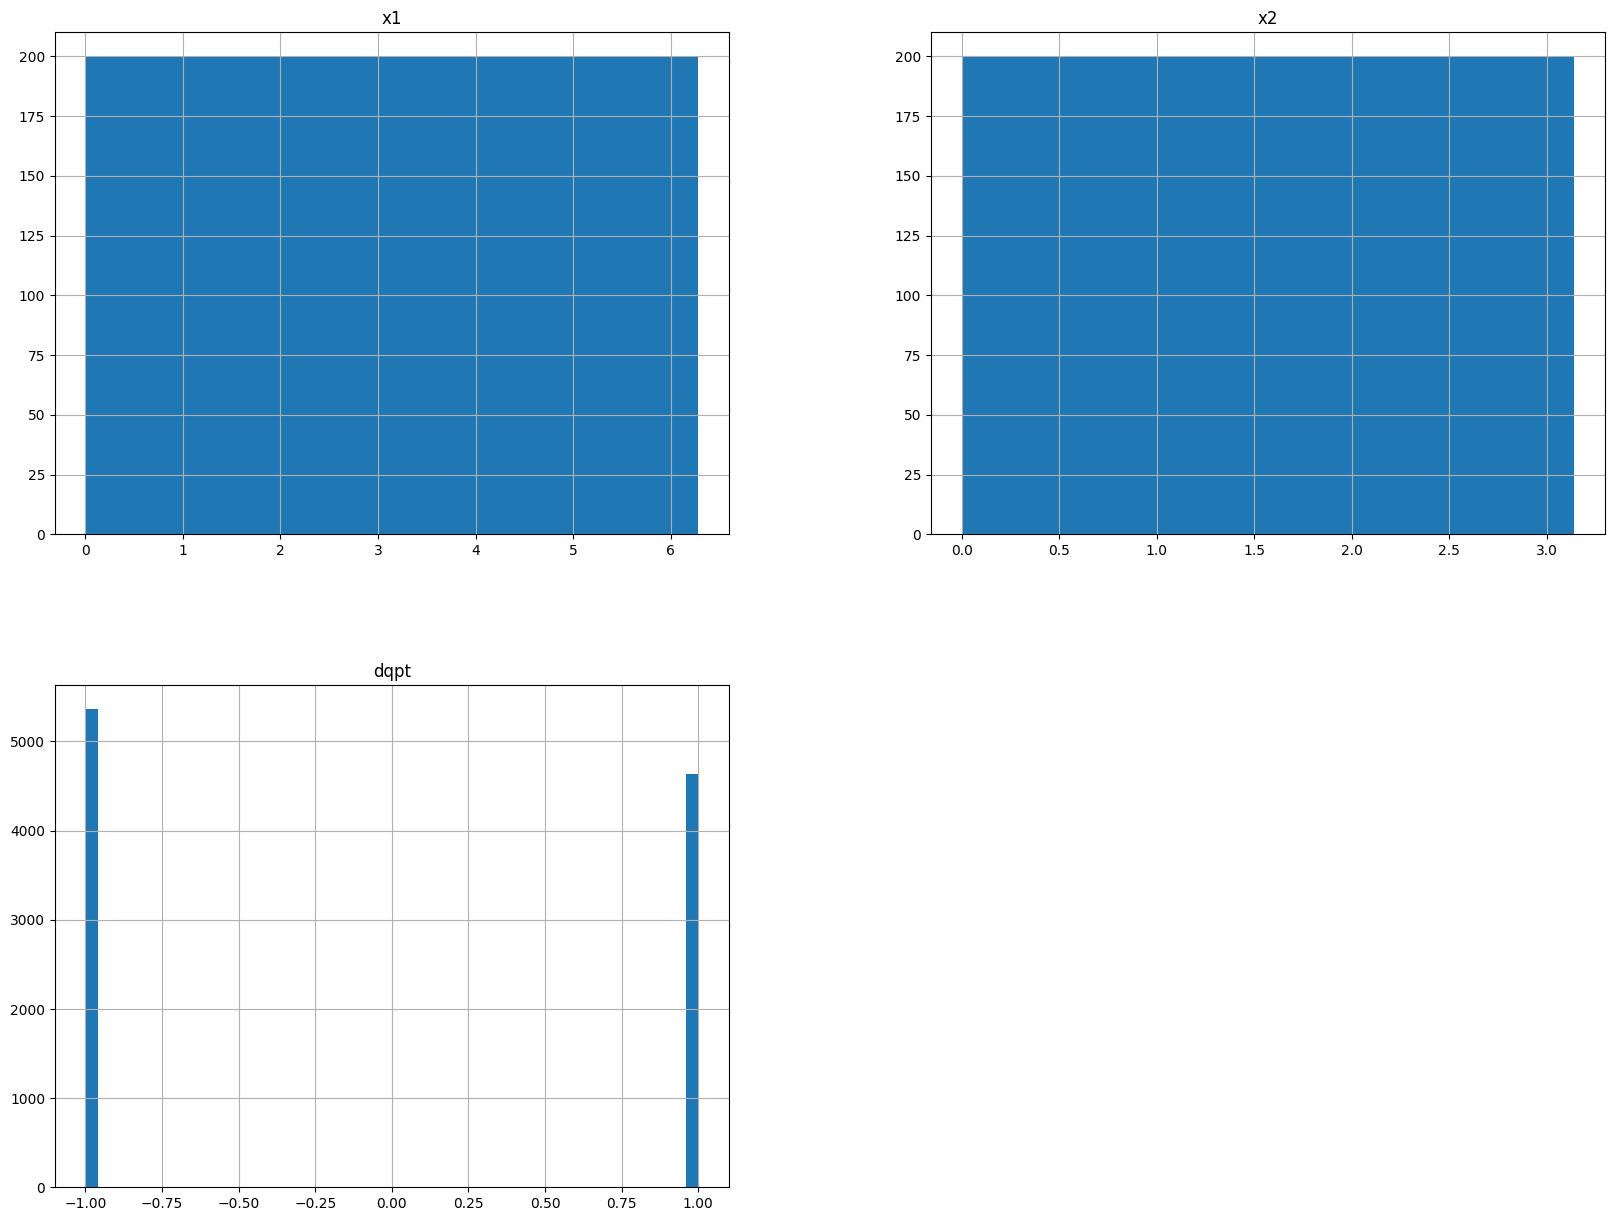

In [ ]:
data.hist( bins=50, figsize=(20,15))

<Axes: >

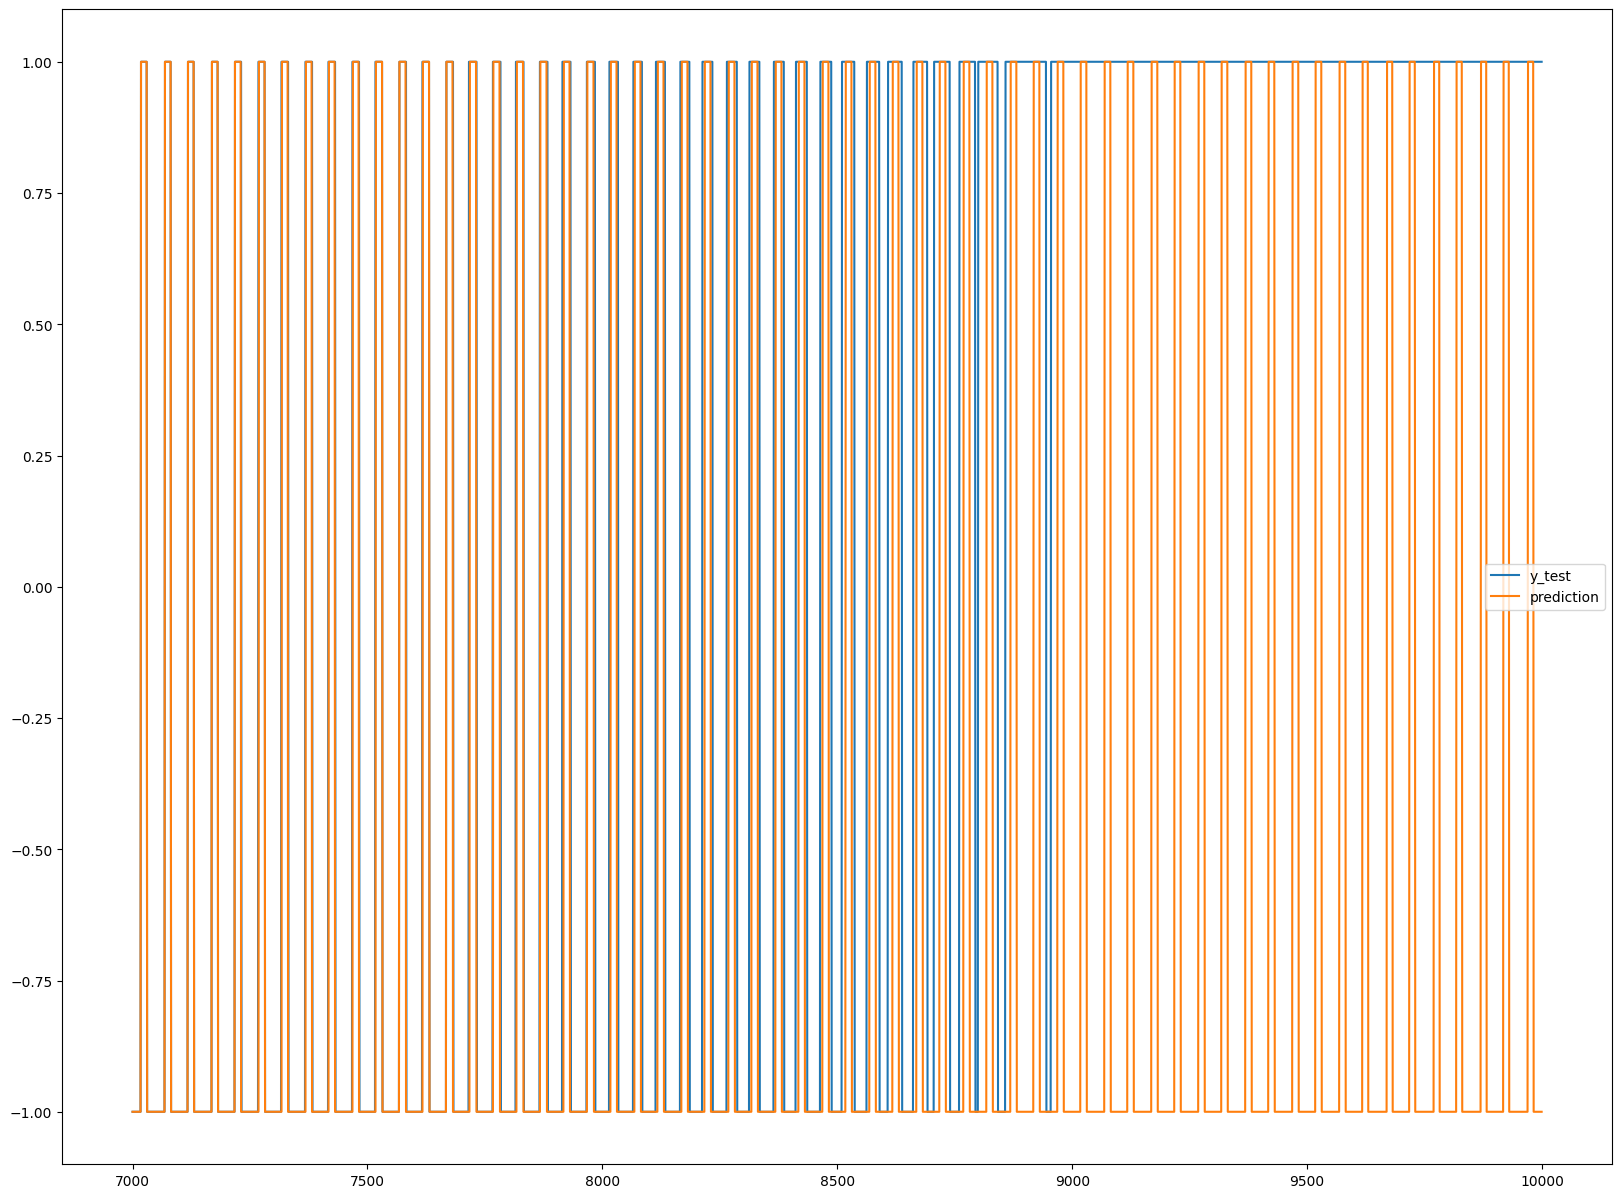

In [ ]:
comparision = pd.DataFrame({'y_test':y_test,'prediction':ypred})
comparision.plot(figsize=(20,15))

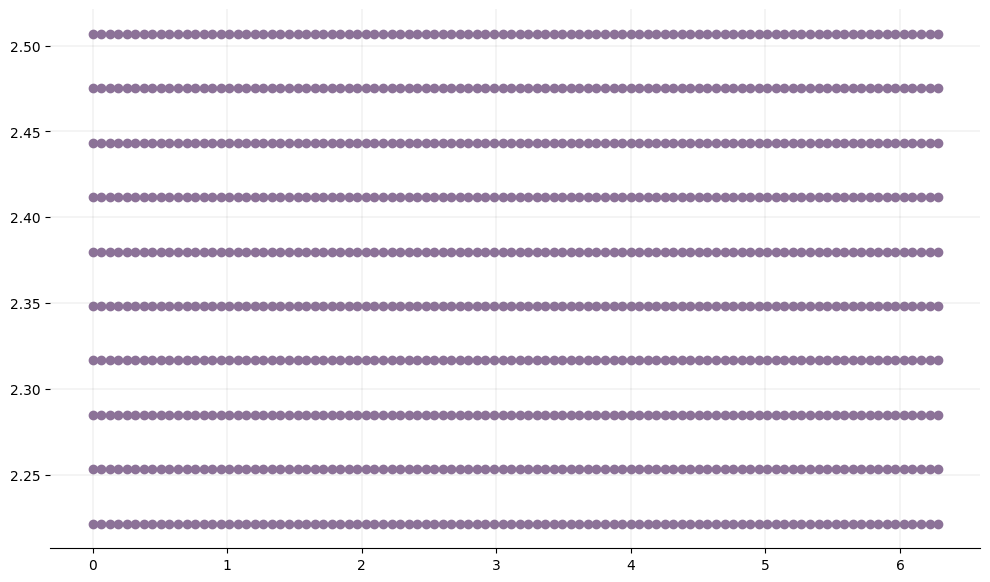

In [ ]:
test_size = int(np.round(10000 * 0.2, 0))
features = pd.DataFrame({'x': x_test['x1'], 'y': x_test['x2']})
# Plotting the training set
fig, ax = plt.subplots(figsize=(12, 7))
# removing to and right border
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
# adding major gridlines
ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
ax.scatter(features[:-test_size]['x'], features[:-test_size]['y'], color="#8C7298")
plt.show()